In [55]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', -1)

In [17]:
rental_data = pd.read_csv("rental.csv")

In [18]:
rental_data.shape

(2974, 222)

In [31]:
rental_data.head()

,name,price,latitude,longitude,url,location,room_type,"""24H Maintenance""","""24H On-Site Security""","""24H Surveillance""",...,"""Window Air Conditioner""","""Window Coverings""","""Wine Fridge""","""freezer included""","""fridge included""","""gym""","""internet available""","""meeting room""","""oven included""","""smoker friendly"""
0,120 Raglan Avenue,"1864.0,2003.0,2347.0",43.686516,-79.421005,https://rentals.ca/york/120-raglan-avenue,York,"Jr. 1 Bedroom,1 Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,310-312 Lonsdale Road,"2134.0,2475.0",43.689224,-79.411199,https://rentals.ca/toronto/310-312-lonsdale-road,Toronto,"1 Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35 Walmer Road,"2183.0,2353.0,2888.0",43.668877,-79.405555,https://rentals.ca/toronto/35-walmer-road,Toronto,"Jr. 1 Bedroom,1 Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50 Spadina Road,"2549.0,2732.0,3506.0",43.669070,-79.404672,https://rentals.ca/toronto/50-spadina-road,Toronto,"1 Bedroom,Large 1-Bedroom,2 Bedroom",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45 Carlton Street,3700.0,43.661415,-79.380663,https://rentals.ca/toronto/45-carlton-street-2,Toronto,2.5 Bedroom,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
max(rental_data.longitude), min(rental_data.longitude), max(rental_data.latitude), min(rental_data.latitude)

(-79.183003, -79.6094349999999, 43.8264097, 43.553268)

In [35]:
#Remove various symbols in columns
fixed_columns = []
for col_val in rental_data.columns:
    fixed_columns.append(re.sub(r'\W+', '', col_val.replace('"', '')))

In [39]:
rental_data.columns = fixed_columns

In [46]:
#fill na with 0s
rental_data = rental_data.fillna(0)

In [51]:
#check how many of the properties has the features and store in count_list
count_list = []
for col in rental_data.columns[7:]:
    count_list.append(sum(rental_data[col]))

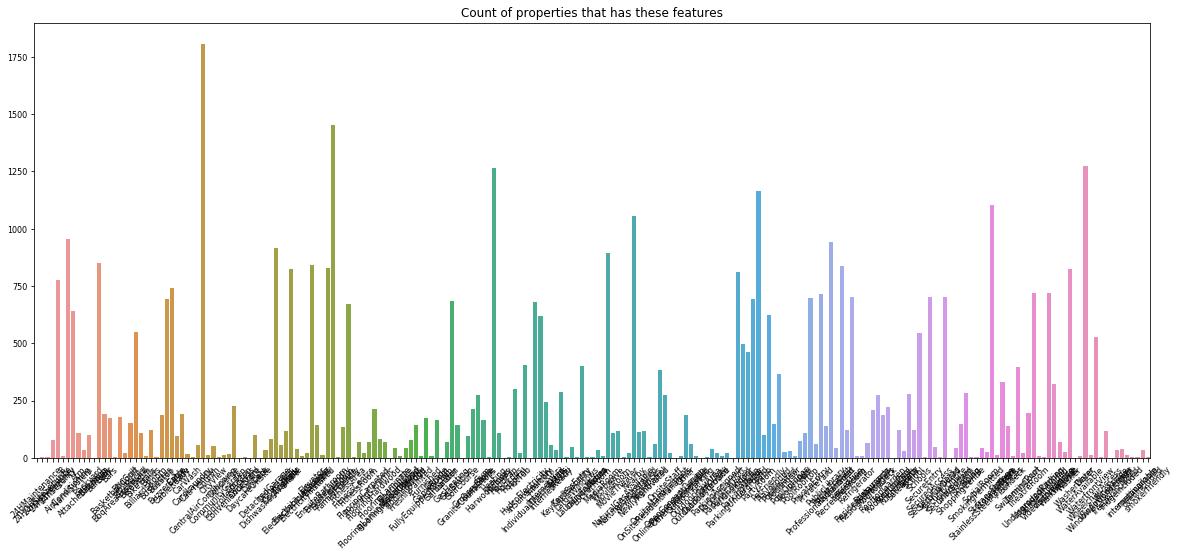

In [60]:
plt.figure(figsize=(20, 8))
count_plot = sns.barplot(rental_data.columns[7:], count_list)
for item in count_plot.get_xticklabels():
    item.set_rotation(45)
count_plot.tick_params(labelsize=8)
plt.title("Count of properties that has these features")
plt.show()

In [64]:
#Check number of properties greater than a threshold
sum(np.array(count_list) >= 30)

134

In [96]:
#Expand price and room type into multiple rows
name_cols = ["price", "url", "room_type"]
result_price = pd.DataFrame([(d, tup.url) for tup in rental_data.itertuples() for d in tup.price.split(",")])
result_room = pd.DataFrame([(d, tup.url) for tup in rental_data.itertuples() for d in tup.room_type.split(",")])
concat_result = pd.concat([result_price, result_room], axis = 1).iloc[:, :-1]
concat_result.columns = name_cols
concat_result.head()

,price,url,room_type
0,1864.0,https://rentals.ca/york/120-raglan-avenue,Jr. 1 Bedroom
1,2003.0,https://rentals.ca/york/120-raglan-avenue,1 Bedroom
2,2347.0,https://rentals.ca/york/120-raglan-avenue,2 Bedroom
3,2134.0,https://rentals.ca/toronto/310-312-lonsdale-road,1 Bedroom
4,2475.0,https://rentals.ca/toronto/310-312-lonsdale-road,2 Bedroom


In [97]:
concat_result.shape

(3729, 3)

In [89]:
test_df = rental_data.drop(columns=['price', 'room_type'])

In [90]:
test_df.head()

,name,latitude,longitude,url,location,24HMaintenance,24HOnSiteSecurity,24HSurveillance,24hEmergency,24hSecurity,...,WindowAirConditioner,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly
0,120 Raglan Avenue,43.686516,-79.421005,https://rentals.ca/york/120-raglan-avenue,York,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,310-312 Lonsdale Road,43.689224,-79.411199,https://rentals.ca/toronto/310-312-lonsdale-road,Toronto,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35 Walmer Road,43.668877,-79.405555,https://rentals.ca/toronto/35-walmer-road,Toronto,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50 Spadina Road,43.669070,-79.404672,https://rentals.ca/toronto/50-spadina-road,Toronto,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45 Carlton Street,43.661415,-79.380663,https://rentals.ca/toronto/45-carlton-street-2,Toronto,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
processed_rental = pd.merge(concat_result,test_df,on=['url'])
processed_rental.shape

(3729, 222)

In [101]:
processed_rental.head()

,price,url,room_type,name,latitude,longitude,location,24HMaintenance,24HOnSiteSecurity,24HSurveillance,...,WindowAirConditioner,WindowCoverings,WineFridge,freezerincluded,fridgeincluded,gym,internetavailable,meetingroom,ovenincluded,smokerfriendly
0,1864.0,https://rentals.ca/york/120-raglan-avenue,Jr. 1 Bedroom,120 Raglan Avenue,43.686516,-79.421005,York,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003.0,https://rentals.ca/york/120-raglan-avenue,1 Bedroom,120 Raglan Avenue,43.686516,-79.421005,York,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2347.0,https://rentals.ca/york/120-raglan-avenue,2 Bedroom,120 Raglan Avenue,43.686516,-79.421005,York,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2134.0,https://rentals.ca/toronto/310-312-lonsdale-road,1 Bedroom,310-312 Lonsdale Road,43.689224,-79.411199,Toronto,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2475.0,https://rentals.ca/toronto/310-312-lonsdale-road,2 Bedroom,310-312 Lonsdale Road,43.689224,-79.411199,Toronto,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
processed_rental.room_type.unique()

array(['Jr. 1 Bedroom', '1 Bedroom', '2 Bedroom', 'Large 1-Bedroom',
       '2.5 Bedroom', '1 Bedroom Med Renovated',
       '1 Bedroom Large Renovated', '2 Bedrooms Renovated',
       '2 Bedroom Renovated', 'One Bedroom', 'One Bedroom (Large)',
       'Two Bedroom', 'Bachelor', '3 Bedroom', '0 Bedroom', 'None',
       '1.5 Bedroom', 'Bachelor Suites', 'One Bedroom Suites',
       'One Bedroom plus Den', 'One Bedroom Deluxe', 'Two Bedroom Suites',
       '1.0 Bedroom', '2.0 Bedroom', 'Condo', '1 bedroom', '2 bedrooms',
       'Three Bedroom', 'Two Bedroom + Den', 'Large 2 Bedroom',
       'Two Bed / One Bath', 'Studio', '1 Bedroom and Den',
       '2 Bedroom + Den', '1 Bedroom Townhome', 'One Bedroom Apartment',
       'Two Bedroom Apartment', '3.5 Bedroom', 'Jr 1 Bedroom',
       '3 bedrooms', 'Townhouse - 2 Bedroom', '3 Bedroom Townhouse + Den',
       'Junior One Bedroom', 'Two Bedroom plus Den',
       'Three Bedroom Apartment', '4 Bedroom', '0.5 Bedroom',
       '2 Bedrooms', '3 B